In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [3]:
fname = "200625//200625_Bi2Te30617_temp_coeff_test1.txt"
df = pd.read_csv(fname, sep = " ", header = 0)
Rref = 3 #ohms

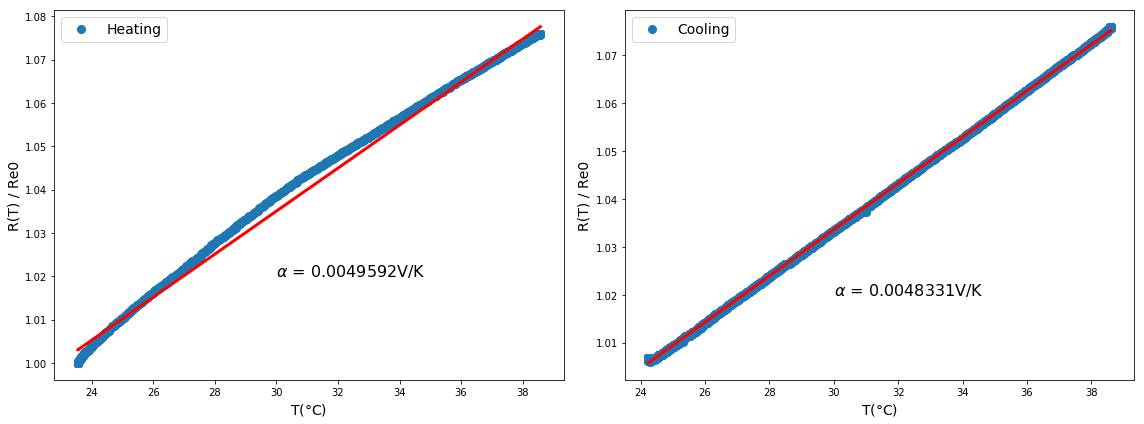

In [21]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
df['Tavg'] = (df['Tl'] + df['Tr']) / 2
df['Rsamp'] = df['Vsamp'] / df['Vref'] * Rref

fig, axs = plt.subplots(1,2, figsize = (16,6))
mask = df['Rsamp'].idxmax()
#heating
x = df['Tavg'][0 : mask]
y = df['Rsamp'][0 : mask] / df['Rsamp'].iloc[0]
m1, b1 = np.polyfit(x, y, 1)
axs[0].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
axs[0].plot(x, np.polyval([m1,b1], x), color = 'red', linewidth = 3)
axs[0].text(30, 1.02, rf'$\alpha$ = {round(m1,7)}V/K', fontsize = 16)
axs[0].set_xlabel(r'T($\degree$C)', fontsize = 14)
axs[0].set_ylabel('R(T) / Re0', fontsize = 14)
axs[0].legend(fontsize = 14)

#cooling
x = df['Tavg'][mask:]
y = df['Rsamp'][mask:] / df['Rsamp'].iloc[0]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(x, np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(30, 1.02, rf'$\alpha$ = {round(m2,7)}V/K', fontsize = 16)
axs[1].set_xlabel(r'T($\degree$C)', fontsize = 14)
axs[1].set_ylabel('R(T) / Re0', fontsize = 14)
axs[1].legend(fontsize = 14)

plt.tight_layout()

fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 300)

0    57.11499
1    57.11499
2    57.11499
3    57.11499
4    57.11499
Name: Tavg, dtype: float64